# CH413: Advanced Computational Chemistry
## Time-dependent quantum mechanics

### Scott Habershon, Department of Chemistry

## Overview

In Lecture 2 of the CH413 time-dependent quantum mechanics section, we discussed the discrete variable representation and its use in finding the eigenstates and eigenvalues of few-dimensional systems. In addition, we saw how these eigenstates can be used to propagate wavefunctions.

In this example Jupyter notebook, we will implement this DVR-based method to evolve a wavepacket moving on a one-dimensional harmonic oscillator potential.


## Solving the Schrodinger equation using the discrete variable representation (DVR)

First, we're going to use the discrete variable representation (DVR) as the basis of a simple program which will enable us to calculate the allowed eigenvalues (*i.e.* energies) and eigenfunctions for some one-dimensional problems. Later, we'll see how DVR can be used as a basis for a method for *propagating* wavefunctions.

### Solving the Schrodinger equation with a basis set

Following on from the lectures, we will suppose that we are interested in a particle of mass $m$ moving in 1-dimension $x$. If the *potential energy* function that the particle moves in is $V(x)$, then the total Hamiltonian of the system is:

$$
\hat{H} = -\frac{\hbar^{2}}{2m} \frac{d^{2}}{dx^{2}} + V(x).
$$

The allowed stats of the system are those which satisfy the *time-independent Schrodinger equation*, given by

$$
\hat{H} \psi_{i}(x) = E_{i} \psi_{i}(x).
$$

In other words, there are a number of allowed states (or eigenfunctions) $\psi_{i}(x)$, each with a corresponding energy (or eigenvalue) $E_{i}$. 

**Our aim is to determine the allowed solution** $\psi_{i}(x)$ **and** $E_{i}$. **The DVR method is a simple way of doing this...** 

Now, suppose we assume that the eigenfunction $\psi_{i}(x)$ can be written as a linear combination of *basis functions*:

$$
\psi_{i}(x) = \sum_{j=1}^{N} c_{ji} \phi_{j}(x)
$$

where $c_{ij}$ is an expansion coefficient. For simplicity, we assume that we're using *orthonormal* basis functions, which means

$$
\int \phi_{i}^{*}(x) \phi_{j}(x) \, dx = \delta_{ij} 
$$

Substituting our linear expansion into the time-independent Schrodinger equation gives:

$$
\sum_{j=1}^{N} c_{ji} \hat{H} \phi_{j} = E_{i} \sum_{k=1}^{N} c_{ki} \phi_{k}
$$

Now, multiplying each side from the left by $\phi_{m}(x)$, integrating over all $x$ and taking advantage of the orthonormality mentioned above, we find that the Schrodinger equation for $N$ eigenstates can be written as

$$
\mathbf{Hc} = \mathbf{Ec}
$$

where $\mathbf{H}$ is an $N \times N$ Hamiltonian matrix, with elements

$$
H_{ij} = \int \phi_{i}^{*}(x) \hat{H} \phi_{j}(x) \, dx = \int \phi_{i}^{*}(x) \hat{T} \phi_{j}(x) \, dx + \int \phi_{i}^{*}(x) \hat{V} \phi_{j}(x) \, dx = T_{ij} + V_{ij}
$$

$\mathbf{c}$ is the $N \times N$ matrix of expansion coefficients; column $j$ in $\mathbf{c}$ gives us the expansion coefficients of the $N$ basis functions for eigenstate $j$. Finally, $\mathbf{E}$ is a *diagonal* matrix whose elements are simply the eigenvalues (or energies) of the eigenstates $E_{i}$.

Solving $\mathbf{Hc} = \mathbf{Ec}$ to find $\mathbf{c}$ and $\mathbf{E}$ is a standard exercise in linear algebra; technically, this is simply an eigenproblem, and there are lots of well established methods for solution. The only remaining thing we need to consider is the choice of basis functions to allow us to readily evaluate the matrix elements $T_{ij}$ and $V_{ij}$....

## Colbert-Miller DVR 
#### See: D. T. Colbert and W. H. Miller, *J. Chem. Phys.*, **96**, 1982 (1992).

The Colbert-Miller DVR is a particularly simple (and hence attractive) DVR scheme. We won't go through the details here, but the Colbert-Miller DVR scheme can be viewed as using basis functions which are of the form:

$$
\phi_{j}(x) = \sum_{-K}^{K} \frac{e^{i k (x-j\Delta x)}}{\sqrt{2 K}},
$$

where $K = \frac{\pi}{\Delta x}$ and $\Delta x$ is the uniform grid-spacing. These basis functions are essentially Fourier sums over different components $k$...let's have a look what they look like:

<IPython.core.display.Javascript object>


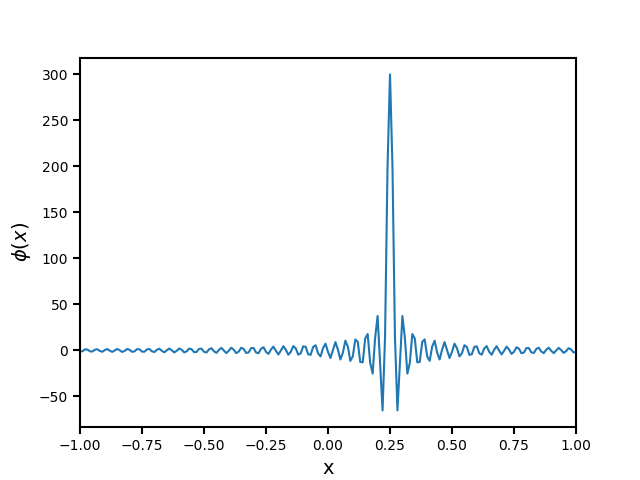

In [45]:
# Initialise matplotlib and numpy.
#
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
plt.rcParams['axes.linewidth']=1.5
plt.tick_params(axis='both',width=1.5,length=5)

# Set up the system. 
# Here, we use a uniform grid in the range [-1,1] with ngrid grid-points.
#
Xmax = 1.0
Xmin = -1.0
Length = Xmax - Xmin
ngrid = 201

# Set the maximum k value - increase this to get a more "delta" delta function!
#
kmax = 150

# Setup plotting of the function centered at x = xloc.
#
xloc = 0.25
im = np.complex(0,1)                        # This is the complex number i.
x = np.linspace(Xmin,Xmax,ngrid)            # Set up the positions of the uniform grid-points along x.
y = np.zeros(ngrid,dtype='complex')         # Set up space for the calculated basis function at each grid-point.


# At each point in the uniform grid, calculate the basis function. Note that y is an array.
#
for i in range(-kmax,kmax):
    y += np.exp( im * i * (x-xloc))
 

# Now plot the basis function at each grid-point.
#
plt.figure(1)
plt.plot(x,y.real)
plt.xlim([Xmin,Xmax])
plt.xlabel('x',fontsize=14)
plt.ylabel(r'$\phi(x)$',fontsize=14)
plt.show()


We see that these basis functions  look like $\delta$-functions centered on each of the positions in the uniform grid; as a result, there are $N$ of these basis functions supported on a uniform grid of $N$ points. 

The Colbert-Miller DVR scheme uses these basis functions, but takes the limit $k \rightarrow \infty$ explicitly when evaluating matrix elements; this is sort of like taking the limit of a infinitely-closely spaced uniform grid. 

The maths is tedious, but the upshot is that the matrix elements in the Colbert-Miller DVR method can be evaluated as follows:

$$
H_{ij} = T_{ij} + V_{ij}
$$

$$
V_{ij} = V(x_{i}) \delta_{ij}
$$

\begin{equation}
\begin{split}
T_{ij} &= \frac{\hbar^{2} (-1)^{(i-j)} \pi^{2}}{6m \Delta x^{2}} \hspace{2cm} \text{if i = j} \\ \\
& = \frac{\hbar^{2} (-1)^{(i-j)} }{m \Delta x^{2} (i-j)^2} \hspace{2cm} \text{if i $\neq$ j}
\end{split}
\end{equation}

Using these equations, it is straightforward to calculate the Hamiltonian matrix elements $H_{ij}$, and to then find the eigenvectors and eigenvalues.


## Example 1: Harmonic oscillator eigenstates and eigenvalues

The potential energy in the 1-D harmonic oscillator is

$$
V(x)=\frac{1}{2}kx^{2} = \frac{1}{2} m \omega^{2} x^{2}
$$

The term  $k$ is the spring constant, which is related to the natural frequency of the oscillator, $\omega$, according to

$$
\omega = \sqrt{\frac{k}{m}}.
$$

The Hamiltonian operator is then

$$
H = -\frac{\hbar^{2}}{2m} \frac{d^{2}}{d x^{2}} + \frac{1}{2} kx^{2}.
$$

The harmonic oscillator is a nice problem because we *know* exactly what the correct eigenfunctions and eigenvalues are (in other words, this is an analytically solvable model). In particular, it turns out that the allowed energy levels of the quantum harmonic oscillator are:

$$
E_{n} = (n+\frac{1}{2}) \hbar \omega, \hspace{3cm} n = 0, 1, 2, \dots
$$

Here, $n$ is a quantum number which identifies the state of the system; the energy spacing between any two adjacent quantum states is $\hbar \omega$.

The eigenfunctions $\psi_{n}(x)$ are all Gaussian functions multipled by *Hermite polynomials*; to see what they look like, consider the following probability distributions:


<IPython.core.display.Javascript object>


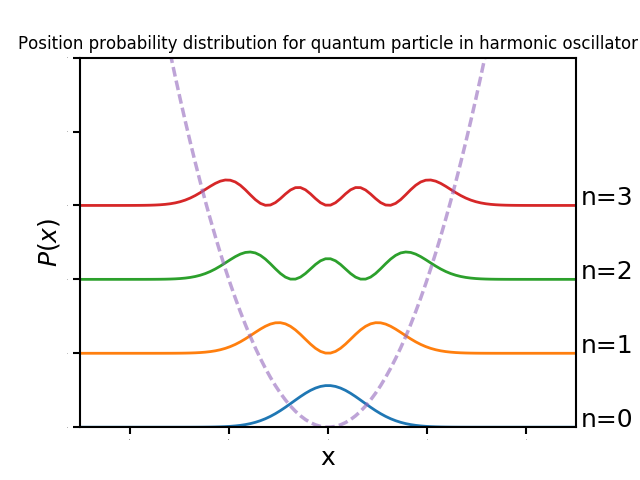

In [46]:
# Plot of first 4 harmonic oscillator eigenstates (ignoring normalization constants, etc.)
#
plt.figure(2)

# Set up a uniform grid for plotting.
#
Length = 5.0
ngrid = 100
x = np.linspace(-Length,Length,ngrid)
dx = x[1] - x[0]

# Create arrays containing first 4 harmonic oscillator eigenstates - these are known 
# (for example, see Atkins Molecular Quantum Mechanics)
#
y = np.zeros([ 4,ngrid])
for i in range(ngrid):
    y[0,i] = np.exp(-0.5 * x[i]**2)
    y[1,i] = np.exp(-0.5*x[i]**2) * x[i]
    y[2,i] = np.exp(-0.5*x[i]**2) * (2*x[i]**2-1)
    y[3,i] = np.exp(-0.5*x[i]**2) * (2*x[i]**3-3*x[i])

    
# Normalize each function.
#
for i in range(ngrid):
    for k in range(4):
        csum = 0.0                                 # This is a simple Simpson's rule integration on grid-spacing dx.
        for j in range(ngrid):
            csum += y[k,j]*y[k,j]*dx
        y[k,:] = y[k,:] / np.sqrt(csum)
        
# Plotting...
plt.plot(x, y[0,:]**2, linewidth=2.0)
plt.text(5.1,0,r'n=0',fontsize=18)
plt.plot(x, y[1,:]**2 + 1.0, linewidth=2.0)
plt.text(5.1,1,r'n=1',fontsize=18)
plt.plot(x, y[2,:]**2 + 2.0, linewidth=2.0)
plt.text(5.1,2,r'n=2',fontsize=18)
plt.plot(x, y[3,:]**2 + 3.0, linewidth=2.0)
plt.text(5.1,3,r'n=3',fontsize=18)
plt.plot(x,0.5*x**2,linewidth=2.5,linestyle='dashed',alpha=0.6)
plt.tick_params(axis='both',width=1.5,length=5)
plt.xlabel('x',fontsize=18)
plt.ylabel(r'$P(x)$',fontsize=18)
plt.xlim((-Length,Length))
plt.ylim((0,5))
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)
plt.title('Position probability distribution for quantum particle in harmonic oscillator', fontsize=12)
plt.show()

So, now lets run the Colbert-Miller DVR solution of this problem....

In [47]:
# Set up harmonic oscillator properties - we'll use atomic units, where hbar = 1.0.
#
kspring = 1.0
mass = 1.0
hbar = 1.0

# Set up the uniform grid:
Xmax = 5.0
Xmin = -5.0
Length = Xmax - Xmin
ngrid = 201
x = np.linspace(Xmin,Xmax,ngrid)
dx = x[1] - x[0]

#
# COLBERT-MILLER DVR HAMILTONIAN CONSTRUCTION.
#
# Set up potential energy matrix.
V = np.zeros((ngrid,ngrid))
for i in range(0,ngrid):
    V[i,i] = 0.5 * kspring * x[i] * x[i] 

# Set up kinetic energy matrix.
T = np.zeros( (ngrid,ngrid) )
for i in range(0,ngrid):
    for j in range(0,ngrid):
        if i == j:
            T[i,j] =  ((hbar**2) * (-1.0)**(i-j) * np.pi**2) / (6 * mass * dx**2 ) 
        else:
            T[i,j] = ((hbar**2) * (-1.0)**(i-j)) / (mass * dx**2 * (i-j)**2 )

# Create the Hamiltonian matrix:
H = T + V

# Solve the eigenvalue problem using the linalg.eigh
E,c = np.linalg.eigh(H)

# IMPORTANT: At this point, E[:] is a vector containing the energies of each eigenstate. 
# The (ngrid x ngrid) matrix c[:,:] contains the eigenstates, namely the expansion coefficient at
# each grid-point. These are stored so that c[j,i] contains the coefficient of basis function i at grid-point j. 

# Print out the first few energy eigenvalues:
print '\n*** Energy eigenvalues ***\n'
print 'E[0] = ', E[0]
print 'E[1] = ', E[1]
print 'E[2] = ', E[2]
print 'E[3] = ', E[3]



*** Energy eigenvalues ***

E[0] =  0.50000000005
E[1] =  1.50000000243
E[2] =  2.50000005659
E[3] =  3.50000083955


We are using atomic units here (so $\hbar = 1$), and we chose the spring constant and mass of the problem such that $\omega = 1$; this means the expected energy spectrum is $E_{0} = 0.5$, $E_{1} = 1.5$, $E_{2} = 2.5$, and so on. This is exactly what we've calculated above!

** But what about the eigenvectors? Do they look as expected? **


First, it is useful to normalize each eigenfunction such that

$$
\int \, \psi_{i}^{*}(x) \psi_{i}(x) \, dx = 1.
$$

Using simple quadrature, this integral can be evaluated on the uniform grid as

$$
\sum_{j=1}^{N} \psi_{i}^{*}(x_{j}) \psi(x_{j}) \Delta x,
$$

where $\Delta x$ is the grid spacing.

In [48]:
# Normalize each eigenfunction using simple quadrature.
#
for i in range(ngrid):  
    csum = 0.0
    for j in range(ngrid):
        csum += c[j,i]*c[j,i]*dx
    c[:,i] = c[:,i] / np.sqrt(csum)

Now we can plot the DVR eigenvectors.....

<IPython.core.display.Javascript object>


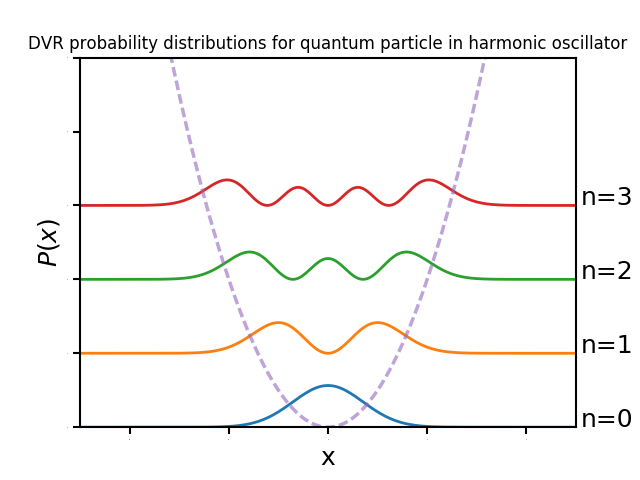

In [49]:
# Plot the probability distributions associated with the eigenvectors.
#
plt.figure(3)
plt.plot(x, (c[:,0])**2, linewidth=2.0)
plt.text(5.1,0,r'n=0',fontsize=18)
plt.plot(x, (c[:,1])**2 + 1.0, linewidth=2.0)
plt.text(5.1,1,r'n=1',fontsize=18)
plt.plot(x, (c[:,2])**2 + 2.0, linewidth=2.0)
plt.text(5.1,2,r'n=2',fontsize=18)
plt.plot(x, (c[:,3])**2 + 3.0, linewidth=2.0)
plt.text(5.1,3,r'n=3',fontsize=18)
plt.plot(x,0.5*x**2,linewidth=2.5,linestyle='dashed',alpha=0.6)
plt.tick_params(axis='both',width=1.5,length=5)
plt.xlabel('x',fontsize=18)
plt.ylabel(r'$P(x)$',fontsize=18)
plt.xlim((-Length,Length))
plt.ylim((0,5))
plt.xlim((Xmin,Xmax))
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)
plt.title('DVR probability distributions for quantum particle in harmonic oscillator',fontsize=12)
plt.show()

If you compare the Figure above to the Figure in which we plotted the *analytical* eigenstates for the harmonic oscillator, you'll see that the results are identical!

The conclusion of the above is that the Colbert-Miller DVR code is a convenient numerical method of giving us the eigenvectors and eigenvalues of any 1-dimensional potential. In the *Assignement* for this course, you'll write your won Colbert-Miller code to find the eigenvectors and eigenvalues for a double-well potential energy function.

## Example 2: Quantum dynamics with known eigenvectors

Once we know the eigenvectors and eigenvalues of the system of interest, performing the time-evolution of any initial wavefunction becomes straightforward.

In particular, recall from the first Lecture that the time-dependent Schrodinger equation is

$$
i \hbar \frac{d \psi(x,t)}{dt} = \hat{H} \psi(x,t).
$$

If the system is in some eigenstate $\psi_{i}(x)$ with energy $E_{i}$, then

$$
\hat{H} \psi_{i}(x,t) = E_{i} \psi_{i}(x,t),
$$
so the time-dependent Schrodinger equation becomes

$$
i \hbar \frac{d \psi(x,t)}{dt} = E_{i} \psi(x,t).
$$

the formal solution of which is

$$
\psi(x,t) = e^{-\frac{i E_{i} t}{\hbar}} \psi_{i}(x,0).
$$

It follows that, if a wavefunction can be written as a linear combination of eigenfunctions

$$
\psi_{x} = \sum_{j=1}^{N} c_{j} \phi_{j}(x),
$$

where

$$
\hat{H} \phi_{j} = E_{j} \phi_{j},
$$

then the wavefunction at time $t$ is also a linear combination of eigenfunctions, albeit weighted by different phase  terms arising due to the different energy eigenvalues.

$$
\psi(x,t) = \sum_{j=1}^{N} c_{j} e^{-\frac{i E_{j} t}{\hbar} } \phi_{j}(x) = \sum_{j=1}^{N} c_{j}(t) \phi_{j}(x),
$$

where we have defined the time-dependent coefficients $c_{j}(t)$. Another way of looking at this is that the coefficients $c_{j}$ oscillate with a phase factor $e^{-\frac{i E_{j} t}{\hbar} }$.


### Choice of initial coefficients

How do we choose the initial coefficients $c_{j}(0)$? Suppose we want our linear combination of eigenvectors to represent some wavefunction $\chi(x)$ at time $t=0$:

$$
\chi(x) = \sum_{j=1}^{N} c_{j}(0) \phi_{j}(x)
$$

To find each of the initial coefficients, we simply multiply both sides of the above $\phi^{*}_{m}(x)$ and integrate over $x$; because of the orthonormality of the eigenvectors (see above), the result is that the coefficient $c_{m}(0)$ is given by

$$
c_{m}(0) = \int \phi_{m}^{*}(x) \chi(x) \, dx \simeq \sum_{j=1}^{N} \phi_{m}^{*}(x_{j}) \chi(x_{j}) \Delta x,
$$

where the second equation is the simple quadrature approximation to the integral evaluated on a uniform grid of $N$ points.

We can obviously write down one of these equations for each of the $N$ basis functions, giving us the initial set of coefficients; once we know these, we can propagate the wavefunction as described above.





### Application to harmonic oscillator

Let's use our harmonic oscillator states to propagate a wavefunction. We'll suppose that the initial wavefunction is a Gaussian function centered at $\mu = -2.5$ and with width parameter $\sigma = 0.5$:

$$
\chi(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^{2}}{2 \sigma^{2}}}
$$

** What does the wavefunction look like as a function of time? **

First, let's plot the initial wavefunction....

<IPython.core.display.Javascript object>


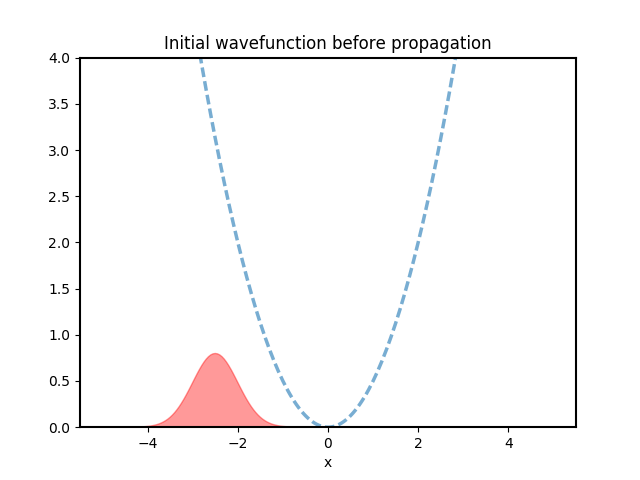

In [50]:
# Initialize wavefunction on the grid.
#
sigma = 0.5
mu = -2.5
chi = (1.0/(sigma*(np.sqrt(2*np.pi)))) * np.exp(-0.5 * (x-mu)**2/sigma**2)

plt.figure(5)
plt.fill(x,chi,color='red',alpha=0.4)
plt.plot(x,0.5*x**2,linewidth=2.5,linestyle='dashed',alpha=0.6)
plt.title('Initial wavefunction before propagation')
plt.ylim([0,4])
plt.xlabel('x')
plt.show()

Now, we've already calculated the eigenvectors for the harmonic potential; we'll write the time-evolving wavefunction as a linear combination of these eigenvectors.

We just need to work out the initial expansion coefficients, as described above; we'll also plot the wavefunction as represented by the linear combination against the original wavefunction to check that they match...

<IPython.core.display.Javascript object>


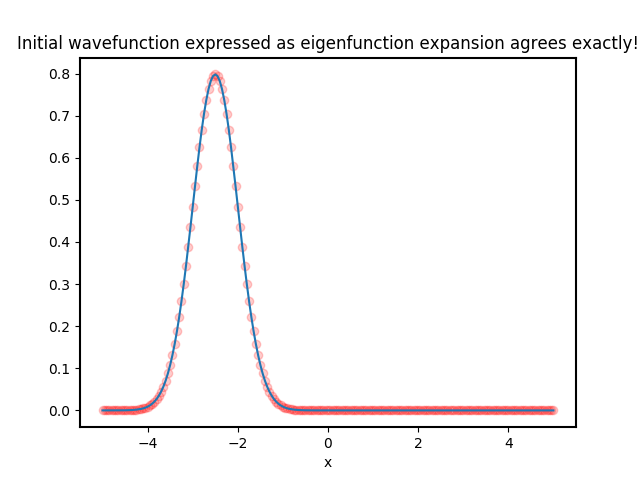

In [51]:
# Calculate the expansion coefficients of each eigenvector using simple integration.
#
coeff = np.zeros(ngrid,dtype='complex')
for i in range(ngrid):
    coeff[i] = np.complex(0.0,0.0)
    for j in range(ngrid):
        coeff[i] += chi[j] * c[j,i] *dx

# Plot the initial wavefunction, as described by the linear combination of eigenvectors - this should 
# be the same as the Gaussian above.
#
chi0 = np.zeros(ngrid,dtype='complex')
for i in range(ngrid):
    for j in range(ngrid):
        chi0[i] += coeff[j] * c[i,j]

# Plotting.
#
plt.figure(6)
plt.plot(x,chi0.real,'ro',alpha = 0.2)
plt.plot(x,chi)
plt.xlabel('x')
plt.title('Initial wavefunction expressed as eigenfunction expansion agrees exactly!', fontsize=12)
plt.show()

<IPython.core.display.Javascript object>


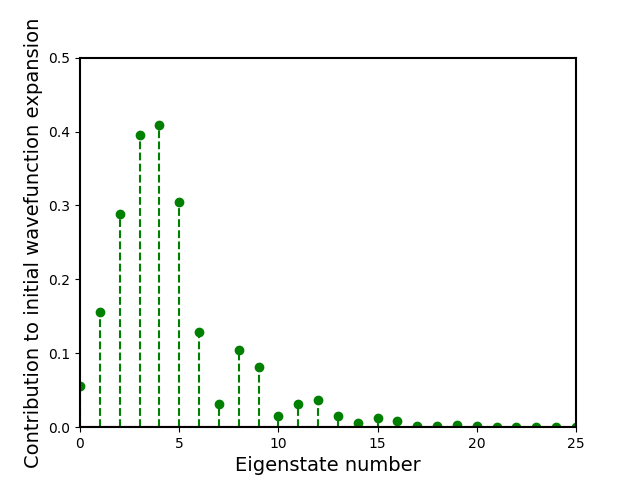

In [52]:
# Lets plot the mixture of eigenstates making up the initial wavefunction.
#
plt.figure(9)
plt.stem(abs(coeff),'g--',alpha=0.1,markerfmt='go')
plt.xlim([0,25])
plt.ylim([0,0.5])
plt.xlabel('Eigenstate number',fontsize=14)
plt.ylabel('Contribution to initial wavefunction expansion',fontsize=14)
plt.show()

Now we know the initial coefficients, we can plot the wavefunction at ANY later time $t$! Let's try it...

<IPython.core.display.Javascript object>


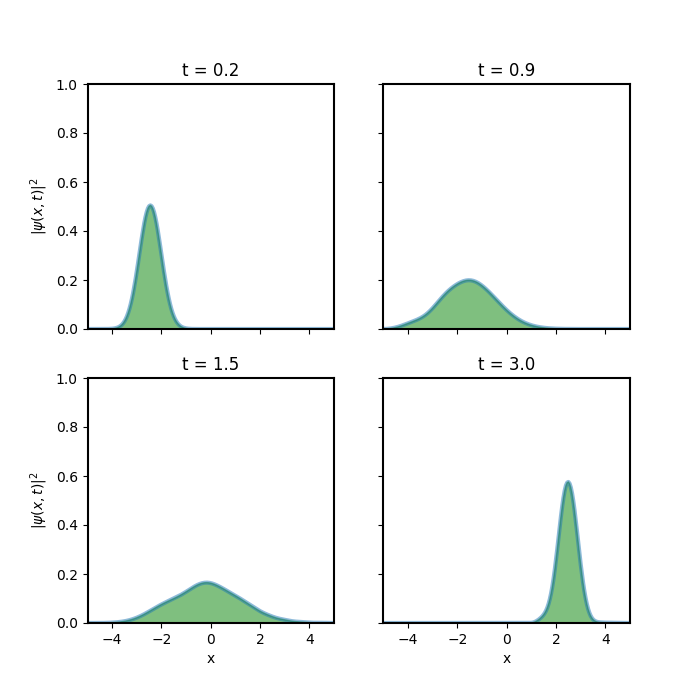

In [53]:
# Let's plot the wavefunction at 4 different times: t = 0.2, 1.0, 1.5 and 3.0.
#
t = [0.2,0.9,1.5,3.0]

wave = np.zeros( (ngrid,4), dtype='complex')

# Loop over positions...
for i in range(ngrid):
    
    # Loop over eigenvectors...
    for j in range(ngrid):
        wave[i,0] += coeff[j] * c[i,j] * np.exp(-im * E[j] * t[0]/hbar)
        wave[i,1] += coeff[j] * c[i,j] * np.exp(-im * E[j] * t[1]/hbar)
        wave[i,2] += coeff[j] * c[i,j] * np.exp(-im * E[j] * t[2]/hbar)
        wave[i,3] += coeff[j] * c[i,j] * np.exp(-im * E[j] * t[3]/hbar)
          
        
# Finally, plot the probability distributions at the 4 different times.
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,sharex='col', sharey='row',figsize=(7,7))
ax1.plot(x,wave[:,0].real**2 + wave[:,0].imag**2,lw=3,alpha=0.5)
ax1.fill(x,wave[:,0].real**2 + wave[:,0].imag**2,color='green',alpha=0.5)
ax1.set_xlim([Xmin,Xmax])
ax1.set_ylim([0,1])
ax1.set_ylabel(r'$\vert \psi(x,t) \vert^{2}$')
ax1.set_title('t = 0.2')

ax2.plot(x,wave[:,1].real**2 + wave[:,1].imag**2,lw=3,alpha=0.5)
ax2.fill(x,wave[:,1].real**2 + wave[:,1].imag**2,color='green',alpha=0.5)
ax2.set_xlim([Xmin,Xmax])
ax2.set_ylim([0,1])
ax2.set_title('t = 0.9')

ax3.plot(x,wave[:,2].real**2 + wave[:,2].imag**2,lw=3,alpha=0.5)
ax3.fill(x,wave[:,2].real**2 + wave[:,2].imag**2,color='green',alpha=0.5)
ax3.set_xlim([Xmin,Xmax])
ax3.set_ylim([0,1])
ax3.set_ylabel(r'$\vert \psi(x,t) \vert^{2}$')
ax3.set_xlabel('x')
ax3.set_title('t = 1.5')

ax4.plot(x,wave[:,3].real**2 + wave[:,3].imag**2,lw=3,alpha=0.5)
ax4.fill(x,wave[:,3].real**2 + wave[:,3].imag**2,color='green',alpha=0.5)
ax4.set_xlim([Xmin,Xmax])
ax4.set_ylim([0,1])
ax4.set_xlabel('x')
ax4.set_title('t = 3.0')

f.show()

## Summary

In this section, we learnt about how we can solve the Schrodinger equation for simple 1-dimensional systems, and how we can propagate wavefunctions once we know the eigenvectors and eigenvalues.

In the assessed work, you will build on these methods; first, you'll implement your own Colbert-Miller DVR for a different 1-dimensional model system, and you'll also learn about the split-operator Fourier transform method for propagating wavefunctions *without* requiring the eigenfunctions.
